In [116]:
from Investment import Investment

import pandas as pd

import datetime

In [117]:
performance = pd.read_csv('base_trades_with_2_child.csv')

performance_2 = pd.read_csv('benchmark_performance.csv')

In [118]:
def get_performance(performance, crypto = "BTC"):

    BTC_performance = performance[performance['sym'] == crypto]

    BTC_performance.drop(['sym', 'open', 'high', 'low', 'close', 'volume', 'max_value', 'min_value', 'pxenter', 'pxenfee', 'idx', 'side', 'pxexit', 'pxexfee', 'exitdate', 'nholds', 'grs_bps',], axis=1, inplace=True)

    BTC_performance = BTC_performance.reset_index(drop=True)

    BTC_performance['net_bps'] = BTC_performance['net_bps'] / 10000

    BTC_performance.dropna(inplace=True)

    BTC_performance['date'] = BTC_performance['date'].astype(str)

    BTC_performance['date'] = pd.to_datetime(BTC_performance['date'], format="%d/%m/%Y")

    return BTC_performance

BTC_performance = get_performance(performance, crypto="BTC")
ETH_performance = get_performance(performance, crypto="ETH")
BNB_performance = get_performance(performance, crypto="BNB")
SOL_performance = get_performance(performance, crypto="SOL")
DOGE_performance = get_performance(performance, crypto="DOGE")
XRP_performance = get_performance(performance, crypto="XRP")

# BTC_performance = pd.concat([BTC_performance, ETH_performance['net_bps']])
ETH_performance


<ipython-input-118-ec0bd3716f06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_performance.drop(['sym', 'open', 'high', 'low', 'close', 'volume', 'max_value', 'min_value', 'pxenter', 'pxenfee', 'idx', 'side', 'pxexit', 'pxexfee', 'exitdate', 'nholds', 'grs_bps',], axis=1, inplace=True)
<ipython-input-118-ec0bd3716f06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_performance.drop(['sym', 'open', 'high', 'low', 'close', 'volume', 'max_value', 'min_value', 'pxenter', 'pxenfee', 'idx', 'side', 'pxexit', 'pxexfee', 'exitdate', 'nholds', 'grs_bps',], axis=1, inplace=True)
<ipython-input-118-ec0bd3716f06>:5: Se

,date,net_bps
0,2017-08-27,-0.015042
1,2017-09-18,-0.130120
2,2017-09-25,0.145591
3,2017-10-13,-0.132462
4,2017-11-09,-0.080271
...,...,...
98,2024-02-06,0.309256
99,2024-02-25,0.163176
100,2024-03-04,-0.030790
101,2024-03-25,-0.088575


In [112]:
def cal_accumulated_pl(crypto_performance):
    
    BTC_accumulated_percent = 1

    # accumulated_percent *= (i['pl_percent'] / 100) + 1
    columns = ["date", "pl_percent"]
    result = pd.DataFrame(columns=columns)
    for i in range(len(crypto_performance)):
        BTC_accumulated_percent *= (crypto_performance.iloc[i]['net_bps']/100) + 1

        row = [crypto_performance.iloc[i]['date'], (BTC_accumulated_percent - 1) * 10000]
        result.loc[len(result.index)] = row

    return result

BTC_performance = cal_accumulated_pl(BTC_performance)
ETH_performance = cal_accumulated_pl(ETH_performance)
BNB_performance = cal_accumulated_pl(BNB_performance)
SOL_performance = cal_accumulated_pl(SOL_performance)
DOGE_performance = cal_accumulated_pl(DOGE_performance)
XRP_performance = cal_accumulated_pl(XRP_performance)

# Make the Data Prettier 

row = pd.DataFrame({"date": datetime.datetime.strptime("2017-08-28", "%Y-%m-%d"), "pl_percent": 0}, index=[0])

row2 = pd.DataFrame({"date": datetime.datetime.strptime("2024-04-10", "%Y-%m-%d"), "pl_percent": XRP_performance["pl_percent"].iloc[-1]}, index=[0])

BNB_performance = pd.concat([row, BNB_performance.loc[:]]).reset_index(drop=True)

SOL_performance = pd.concat([row, SOL_performance.loc[:]]).reset_index(drop=True)

DOGE_performance = pd.concat([row, DOGE_performance.loc[:]]).reset_index(drop=True)

XRP_performance = pd.concat([row, XRP_performance.loc[:]]).reset_index(drop=True)

XRP_performance = pd.concat([XRP_performance.loc[:], row2]).reset_index(drop=True)

XRP_performance 
# DOGE_performance = cal_accumulated_pl(DOGE_performance)
# XRP_performance = cal_accumulated_pl(XRP_performance)

        date  pl_percent
0 2024-04-10  156.934538


,date,pl_percent
0,2017-08-28,0.000000
1,2018-05-04,-45.841175
2,2018-07-02,-55.516744
3,2018-07-16,-63.406171
4,2018-08-17,-87.429079
...,...,...
63,2023-04-28,146.411829
64,2023-05-18,151.121283
65,2023-05-28,162.247348
66,2023-06-04,156.934538


In [113]:
# btc['month'] = btc['month'].astype(str)

# for i in range(len(btc)):
#     if btc.iloc[i]['month'].endswith(".1"):
#         btc.at[i, 'month'] = btc.iloc[i]['month'] + "0"
        
# btc['month'] = pd.to_datetime(btc['month'], format="%Y.%m")

# accumulated_percent = 1

# for i in range(len(btc)):
#     accumulated_percent *= (btc.iloc[i]['returns.2']/100) + 1
#     # row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
#     btc.at[btc.index[i], 'returns.2'] = (accumulated_percent - 1) * 100
#     # result.loc[len(result.index)] = row

# for i in range(len(result)):
#     for j in range(len(btc)):
#         # datetime.datetime.strptime()
#         if result.iloc[i]['date'].year == btc.iloc[j]['month'].year and result.iloc[i]['date'].month == btc.iloc[j]['month'].month:
#             result.at[result.index[i], 'BTC_return'] = btc.iloc[j]['returns.2'] * 100
#             break
# result   

(17406.0, 19807.0)

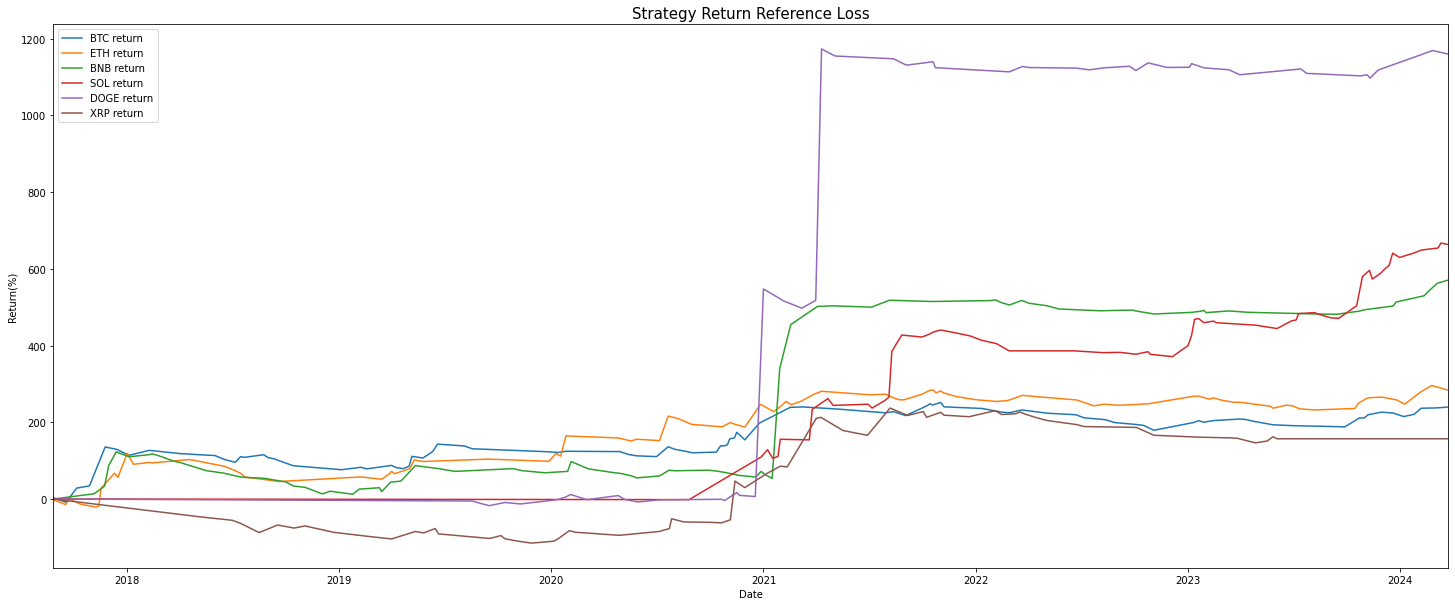

In [114]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(BTC_performance['date'], BTC_performance['pl_percent'], label="BTC return")
plt.plot(ETH_performance['date'], ETH_performance['pl_percent'], label="ETH return")
plt.plot(BNB_performance['date'], BNB_performance['pl_percent'], label="BNB return")
plt.plot(SOL_performance['date'], SOL_performance['pl_percent'], label="SOL return")
plt.plot(DOGE_performance['date'], DOGE_performance['pl_percent'], label="DOGE return")
plt.plot(XRP_performance['date'], XRP_performance['pl_percent'], label="XRP return")
plt.legend()

plt.xlim(BTC_performance['date'].min(), BTC_performance['date'].max())

In [115]:
# columns = ["symbol", "month"]
# result = pd.DataFrame(columns=columns)
# btc = performance[performance["sym.2"] == "BTC"]
# btc.drop(['sym', 'returns', 'Unnamed: 2', 'sym.1', 'year', 'returns.1', 'Unnamed: 6', 'sym.2'], axis=1, inplace=True)
# # print(btc.columns.to_list())
# btc = btc.reset_index(drop=True)
# btc

Month column: data type: float

Convert all data in 'month' column from float to string

Convert all data in 'month' column from string to datetime

1. Get Bitcoin/other cryptos price

    - Cxxt
    - Daily data very good -> directly use in our strategy

2. Process trading result to visualize the data

    - Crypto benchmark return (provided by KDB)
    - Our strategy return (provided by Python)
    - 1. Introduction to the data
    - 2. Crypto benchmark return
            - Get monthly return
            - Drop unwanted column
    - 3. Crypto benchmark return
            - Because the data from month column is of float type, and we need to convert them to date for easier comparison
            - Convert all data in 'month' column from float to string
            - Convert all data in 'month' column from string to datetime
    - 4. Crypto benchmark return
            - Calculate accumulated return
    - 5. Our strategy return
            - Create a new dataframe to store necessary data (i.e. buy_date and pl% of that trade)
    - 6. Our strategy return
            - Calculate accumulated return + Create one more column to store BTC benchmark return (originally set all data in that column to None)
    - 7. Our strategy return
            - Add the data collected from step 4 to the new dataframe created from step 5
    - 8. Visualize the data
            - Photo
